In [1]:
import numpy as np
import matplotlib.pyplot as plt


L=[]
with open("lattice_sizes.txt") as f:
        L = f.readlines()
modified_strings = [s.replace('e+01\n', '') for s in L]
integers = [int(float(s)) for s in modified_strings]
result = ', '.join(str(i) for i in integers)
print(result)
L=[]
for i in (integers):
    L.append(i*10)
# as before load in the lattice sizes

Xtests = []
Xtrains = []
ytests = []
ytrains = []
Ytrains = []
Ytests = []
#empty lists

for k, i in enumerate(L):

    a = np.load('X_tests_{} .npz' .format(i))
    Xtests.append(a['lats'])
    
    b = np.load('X_trains_{} .npz' .format(i))
    Xtrains.append(b['lats'])
    
    c = np.load('y_tests_{} .npz' .format(i))
    ytests.append(c['onehots'])
    
    d =np.load('y_trains_{} .npz' .format(i))
    ytrains.append(d['onehots'])
    
    e =np.load('Yor_trains_{} .npz' .format(i))
    Ytrains.append(e['temps'])
    
    f =np.load('Yor_tests_{} .npz' .format(i))
    Ytests.append(f['temps'])
    
   # print(Xtests[k].shape)
   # print(Xtrains[k].shape)
   # print(ytrains[k].shape)
   # print(ytests[k].shape)
    #uncomment to verify the data is the correct size
# load in any relevant input data to the FCN


1, 2, 3, 4, 5, 6


In [5]:
from keras.models import Sequential, load_model
from keras.layers import *
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import backend as K
from keras import regularizers
from keras.optimizers import Adam



for k,i in enumerate(L):
    model = Sequential()
    model.add(Flatten(input_shape=(i, i)))
    model.add(Dense(100, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01), input_shape=(i**2,)))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy'])
    model.fit(
        Xtrains[k],
        ytrains[k], 
        batch_size = 128,
        epochs = 70,
        verbose = 0,
        validation_split = 0.15,
        callbacks=[
            EarlyStopping(patience=3, verbose=1),
            ReduceLROnPlateau(factor=0.6, patience=2, verbose=0),
            CSVLogger('trainHistory_FCN_new2{}.csv'.format(i))
            ]
        )
    model.save('output/model_FCN_new2{}.h5'.format(i))


Epoch 62: early stopping
Epoch 42: early stopping
Epoch 20: early stopping
Epoch 26: early stopping
Epoch 22: early stopping
Epoch 24: early stopping


In [6]:
for k,i in enumerate(L):
    model = load_model('output/model_FCN_new2{}.h5'.format(i))    

    score = model.evaluate(Xtests[k], ytests[k], verbose=0)
    print('Test loss: ' + str(score[0]))
    print('Test accuracy: ' + str(score[1]))
    #load each model made and return the test loss and test accuracy

Test loss: 0.20333188772201538
Test accuracy: 0.9304999709129333
Test loss: 0.10381020605564117
Test accuracy: 0.9672499895095825
Test loss: 0.09810099750757217
Test accuracy: 0.9752500057220459
Test loss: 0.044644106179475784
Test accuracy: 0.9904999732971191
Test loss: 0.04431122541427612
Test accuracy: 0.9884999990463257
Test loss: 0.03221671283245087
Test accuracy: 0.9940000176429749



t 1.0
153 rows
model_FCN10
5/5 [==============================] - 0s 8ms/step - loss: 0.0672 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.1
153 rows
model_FCN10


C:\Users\Ben\AppData\Local\Temp\ipykernel_16512\1718054424.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print('temperature t accuracy:', np.float(score[1]))


5/5 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.2
153 rows
model_FCN10
5/5 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.3
153 rows
model_FCN10
5/5 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.4
154 rows
model_FCN10
5/5 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.5
154 rows
model_FCN10
5/5 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.6
154 rows
model_FCN10
5/5 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.7
154 rows
model_FCN10
5/5 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.8
154 rows
model_FCN10
5/5 [========

5/5 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.6
154 rows
model_FCN30
5/5 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.7
154 rows
model_FCN30
5/5 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.8
154 rows
model_FCN30
5/5 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 1.0000
temperature t accuracy: 1.0

t 1.9
154 rows
model_FCN30
5/5 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 1.0000
temperature t accuracy: 1.0

t 2.0
154 rows
model_FCN30
5/5 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 1.0000
temperature t accuracy: 1.0

t 2.1
154 rows
model_FCN30
5/5 [==============================] - 0s 1ms/step - loss: 0.1844 - accuracy: 0.9675
temperature t accuracy: 0.9675324559211731

t 2.2
154 rows
model_FCN3

5/5 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 1.0000
temperature t accuracy: 1.0

t 2.1
154 rows
model_FCN50
5/5 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 1.0000
temperature t accuracy: 1.0

t 2.2
154 rows
model_FCN50
5/5 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9221
temperature t accuracy: 0.9220778942108154

t 2.4
154 rows
model_FCN50
5/5 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7857
temperature t accuracy: 0.7857142686843872

t 2.5
154 rows
model_FCN50
5/5 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9935
temperature t accuracy: 0.9935064911842346

t 2.6
154 rows
model_FCN50
5/5 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
temperature t accuracy: 1.0

t 2.7
154 rows
model_FCN50
5/5 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 1.0000
temperature t accuracy: 

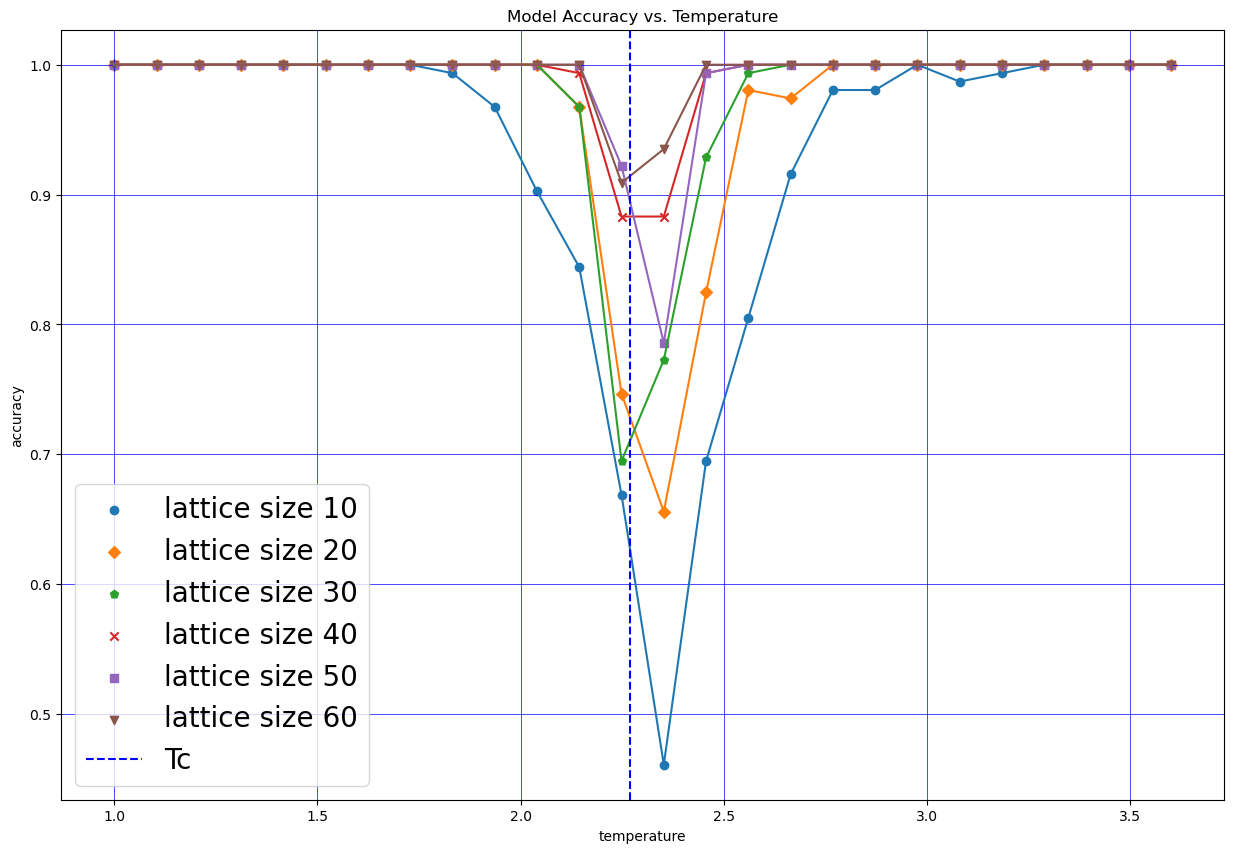

In [7]:
#Y_test = np.around(Y_test,1)
N_samples = int((3.6-1)/0.1)
temperatures = np.linspace(1.0, 3.6, N_samples)
Tc = 2.27
#relevant temperatures and parameters

Ytests2 = []
for i in Ytests:
    a = np.around(i,1)
    Ytests2.append(a)
# round the data in Ytests
model_accuracies_L = []
#make empty list of model accuracies for each lattice size

for k, i in enumerate(L):
    model_accuracies = []
    # empty list for model accuracies per loop
    for t in temperatures:
        print('')
        print('t', round(t,1))
        mask = Ytests2[k] == round(t,1)
        # return original temperatures 
        print(sum(mask), 'rows')
        y_test_t = (ytests[k])[mask]
        X_test_t = (Xtests[k])[mask]
        # y tests where temperature and so on
    
        
        print('model_FCN{}'.format(i))
        model = load_model('output/model_FCN_new2{}.h5'.format(i))
        #load in the premade models
        X_test_t = np.squeeze(X_test_t)
        score = model.evaluate(X_test_t, y_test_t)
        model_accuracies.append(score[1])
        print('temperature t accuracy:', np.float(score[1]))
        #calculate model accuracies
    model_accuracies_L.append(model_accuracies)
    #append to list

markers = ["o", "D", "p", "x", "s", "v"]
#different markers for up to 6 varying lattice sizes

fig, ax = plt.subplots(figsize=(15,10))
#make plot
for k, i in enumerate(L):
    
    ax.plot(temperatures, model_accuracies_L[k], )
    ax.scatter(temperatures, model_accuracies_L[k], label='lattice size {}'.format(i), marker = markers[k])
    #for each lattice, plot temperatures vs model accuracies as line and scatterplot
ax.axvline(x=Tc, color='b', linestyle='--', label = 'Tc')
ax.set_xlabel('temperature')
ax.set_ylabel('accuracy')
ax.set_title('Model Accuracy vs. Temperature')
ax.grid(color='b', linewidth=.5)
ax.legend(prop={'size': 20})
plt.savefig('output/FCNmodel_accuracies_vs_temperature.jpg')
plt.show()
#add labels to the graph and save to output figure

5/5 [==============================] - 0s 1ms/step


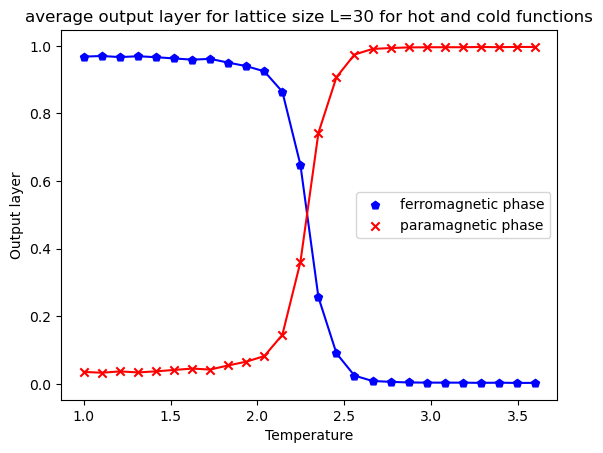

In [8]:

confidences= []
confidences_k1_mean = []
confidences_k2_mean = []
#empty list for confidences and the mean value for each output layer
for t in temperatures:
    mask = Ytests2[2] == round(t,1)
    y_test_t = (ytests[2])[mask]
    X_test_t = (Xtests[2])[mask]
    model = load_model('output/model_FCN_new2{}.h5'.format(30))
    X_test_t = np.squeeze(X_test_t)
    confidence = model.predict(X_test_t)
    #predict test data using model
    confidences_k1_ = []
    confidences_k2_ = []
    for i in confidence:
        confidences_k1_.append(i[0])
        confidences_k2_.append(i[1])
        
    #calculate average output layer and append to list    
    mean_a = np.mean(confidences_k1_)
    mean_b = np.mean(confidences_k2_)
    confidences_k1_mean.append(mean_a)
    confidences_k2_mean.append(mean_b)
    
#print(confidences_k1_mean)        
#print(confidences_k2_mean)   
#verify these look like they should make sense
plt.plot(temperatures,confidences_k1_mean, color="blue")
plt.plot(temperatures, confidences_k2_mean, color="red")
plt.scatter(temperatures, confidences_k1_mean, marker = "p", color="blue", label = "ferromagnetic phase")
plt.scatter(temperatures, confidences_k2_mean, marker = "x", color="red", label= "paramagnetic phase")
# make scatter and line plots of each output layer
plt.xlabel("Temperature")
plt.ylabel("Output layer")
plt.title("average output layer for lattice size L=30 for hot and cold functions")
plt.legend()
plt.savefig('output/FCN_average_outputlayer.jpg')
plt.show()
# add labels, save figure and show
